# Exercise 02 Regression Models

In this exercise, you need to follow the requirements of each question to generate the Python code, and the following example is for reference：

- Sample Question: Write a program that takes the user's name as input and prints "Hello, [name]!" where [name] is the user's input.

- Potential Answer:

```python
    name = input("Enter your name: ")
    print("Hello, " + name + "!")
```
- If you enter 'David', the code will output 'Hello, David!', and this will satisfy the requirements.

## Attention
- Generally, there will be multiple answers for one question and you don't have to strictly follow the instructions in the tutorial, as long as you can make the output of the code meet the requirements of the question.
- If possible, strive to make your code concise and avoid excessive reliance on less commonly used libraries.
- You may need to search for information on the Internet to complete the excercise.

### Question 01:

Consider the following dataset:

```python
    from sklearn.linear_model import LinearRegression
    import numpy as np
    X = np.array([[1.5, 2, 3], [2, 7, 5], [4, 2, -1], [4, 6, 4]])
    y = np.array([4, 8, 6, 9])
```

Apply linear regression using the `LinearRegression` class from `sklearn.linear_model`. Print the coefficients (weights) and the intercept of the linear regression model.

### Write your answer in the following code frame:

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([[1.5, 2, 3], [2, 7, 5], [4, 2, -1], [4, 6, 4]])
y = np.array([4, 8, 6, 9])

model = LinearRegression()
answer = model.fit(X,y)
print(f"the coefficient is: {answer.coef_}")
print(f"the intercept is: {answer.intercept_}")

the coefficient is: [0.86956522 0.69565217 0.04347826]
the intercept is: 1.1739130434782634


### Question 02:

Suppose you have a linear regression model with coefficients w1 = [0.5, 0.9, 1.2] and intercept w0 = 2.4. Given a new data point X_new = [3, 4, 6], calculate the predicted output using the linear regression model.

- Hint: using the dot product in numpy library.

### Write your answer in the following code frame:

In [6]:
import numpy as np

w1 = np.array([0.5,0.9,1.2])
w0 = 2.4
X_new = np.array([3,4,6])

output = w1 @ X_new + w0
print(output)

14.7


### Question 03:

Given a dataset loaded from a CSV file named 'FD_data.csv' containing columns 'k' (density) and 'q' (flow), create a scatter plot using the matplotlib library to visualize the relationship between density and flow. Label the x-axis as 'Density (veh/km)' and the y-axis as 'Flow (veh/hour)'. Remember to add grid lines to the plot.

### Write your answer in the following code frame:

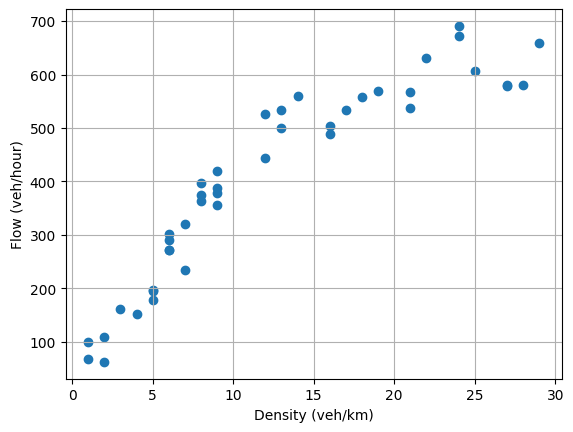

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('FD_data.csv')
plt.scatter(df['k'], df['q'])
plt.xlabel('Density (veh/km)')
plt.ylabel('Flow (veh/hour)')

plt.grid()
plt.show()

### Question 04 (optional):

Extend the scatter plot code in question 03 to **add a linear regression line to the plot**. Fit a linear regression model to the 'FD_data' dataset and plot the linear regression line along with the scatter plot.

### Write your answer in the following code frame:

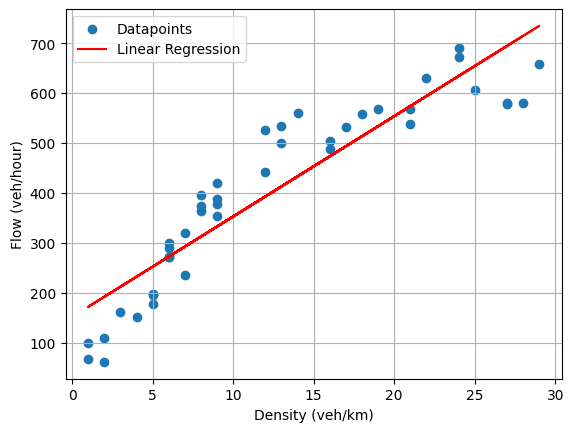

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('FD_data.csv')

X = np.array(df['k']).reshape(-1,1)
y = np.array(df['q']).reshape(-1,1)

model = LinearRegression()
model.fit(X,y)

y_predicted = np.array(model.predict(X)).reshape(-1,1)

plt.scatter(X,y, label = 'Datapoints')
plt.plot(X, y_predicted, color = 'red', label='Linear Regression')

plt.legend()
plt.xlabel('Density (veh/km)')
plt.ylabel('Flow (veh/hour)')
plt.grid()
plt.show()

### Question 05 (optional):

Calculate the coefficient of determination (R^2) to evaluate the goodness of fit.

The $R^2$ formulation can be demonstrated as follows:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

The sum of squares of residuals, also called the residual sum of squares ($SS_{res}$):
  
$$ SS_{res} = \sum_{i}{(y_{i}-f_{i})}^{2}  $$
- $y_{i}$ is the label or true value
- $f_{i}$ is the predicted value

The total sum of squares (proportional to the variance of the data, $SS_{tot}$):

$$ SS_{tot} = \sum_{i}{(y_{i}-\bar{y} )}^{2}  $$

- $\bar{y}$ is the mean value for $y_1, y_2, \dots, y_n$

If you want to implement the above formula as an exercise, you can write your own program to calculate the $R^2$. However, There are existing third-party libraries in Python that help us easily calculate $R^2$ **without having to write our own programs**. You can refer to the following code in `sklearn.metrics`:

```python
    from sklearn.metrics import r2_score
```

### Write your answer in the following code frame:


In [29]:
from sklearn.metrics import r2_score

df = pd.read_csv('FD_data.csv')

y_mean = df['q'].mean()

SS_tot = ((df['q'] - y_mean) ** 2).sum()

model = LinearRegression()
model.fit(X,y)

df['Predicted q'] = model.predict(X)
SS_res = ((df['q'] - df['Predicted q']) ** 2).sum()

R_2 = 1 - (SS_res/SS_tot)

automated_r2 = r2_score(df['q'],df['Predicted q'])

print(R_2 == automated_r2)



True
